In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
import matplotlib.cm as cmx
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

%matplotlib inline

## Read in the data

In [3]:
# read in the data (version with complexity imputed)
df = pd.read_csv("../Data/Hawaii_RegimesPredictors_complete.txt", sep="\t", decimal=",")

In [4]:
# get summary statistics
df.describe()

,id_spatial,Long,Lat,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,...,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth,Regime,Regime1,Regime2,Regime3,Regime5
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,519.274194,-156.973185,20.728832,17.370766,6.111688,58.813531,7.276603,8.467413,15.814621,10.134796,...,9.001442,20.822663,0.115180,10.690679,9.546872,2.603226,0.275806,0.277419,0.230645,0.216129
std,294.974727,1.199391,0.813619,17.109478,6.080902,20.105815,9.787721,10.964297,25.898379,17.675988,...,0.814026,22.295760,0.066225,6.572382,6.090539,1.446065,0.447281,0.448087,0.421586,0.411936
min,4.000000,-160.250286,18.965413,0.000000,0.000000,12.313535,0.000000,0.000000,0.000000,0.000000,...,6.824600,0.886858,0.041487,-1.309367,0.487680,1.000000,0.000000,0.000000,0.000000,0.000000
25%,272.500000,-157.801203,19.856367,3.137780,1.600000,43.247987,0.067343,1.000000,2.425361,0.047486,...,8.343100,6.154151,0.057143,5.542395,4.600000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,522.500000,-156.808687,20.907583,10.805405,4.389021,58.537204,3.491075,4.247239,7.624393,4.293422,...,9.263800,11.545006,0.091254,9.767888,8.794600,2.000000,0.000000,0.000000,0.000000,0.000000
75%,775.500000,-155.982067,21.269171,29.374330,8.800000,75.215385,10.860417,11.179449,17.728449,11.642033,...,9.515100,31.146552,0.166070,13.947940,13.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,1024.000000,-154.820645,22.235486,73.287671,39.687500,98.600000,60.000000,64.000000,268.077556,127.187391,...,11.714200,114.938387,0.503056,35.868209,30.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# take a look at the first 14 columns that weren't used in their boosted regression trees
df.iloc[0:5, 0:14]

,id_spatial,Long,Lat,Island,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,Browsers,Predators,Secondary
0,4,-157.307727,21.106717,Molokai,1.023891,1.706485,77.815700,18.088737,1.023891,1.324986,0.153250,0.163843,0.000000,3.393998
1,5,-157.304986,21.113497,Molokai,3.555556,1.333333,83.555556,9.777778,0.888889,0.890407,0.000000,0.248076,0.000000,2.872683
2,6,-157.303306,21.124814,Molokai,17.620555,6.348836,44.875760,25.716525,4.836712,4.628477,0.143309,5.420154,1.347466,2.238995
3,8,-157.299938,21.148297,Molokai,0.675676,1.351351,86.486487,0.337838,5.743243,0.069128,0.000000,0.000000,0.000000,3.341160
4,9,-157.300286,21.128897,Molokai,4.000000,3.111111,53.333333,17.333333,21.777778,11.775000,0.000000,1.655366,0.967914,8.411082


In [6]:
# other columns that weren't used in their boosted regression trees
df.iloc[0:5, 34:]

,Regime,Regime1,Regime2,Regime3,Regime5
0,1,1,0,0,0
1,1,1,0,0,0
2,2,0,1,0,0
3,1,1,0,0,0
4,2,0,1,0,0


In [7]:
# column s that were used in the boosted trees
df.iloc[0:10, 14:34]

,Effluent,Sedimentation,New_Development,Habitat_Modification,Invasive_Algae,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
0,0.000000,0.075594,0.004250,0,0,0.013817,0.396614,5.622424,3.671531,0.373111,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,4.889608,2.8000
1,0.000000,0.261318,0.004023,0,0,0.013817,0.386873,0.000000,0.000000,0.364839,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,3.793523,7.3152
2,0.000000,0.381684,0.003573,0,0,0.013817,0.377407,0.000000,0.000000,0.309139,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,38.007866,0.084089,5.275938,11.5000
3,0.000000,0.135392,0.000406,0,0,0.013817,0.353853,0.000000,0.000000,0.059943,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,39.139775,0.087039,2.511288,29.1000
4,0.000000,0.577138,0.003794,0,0,0.013817,0.369782,0.000000,0.000000,0.342674,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,40.587803,0.084932,6.865359,10.0584
5,0.000000,0.003530,0.002394,0,0,0.013817,0.408517,0.000000,0.000000,0.221847,27.394,0.945199,0.1213,0.0237,52.643398,8.5628,16.757051,0.086828,6.381398,10.9728
6,438.560303,3.367408,0.003930,0,0,0.013817,0.350479,5.997168,0.000000,0.358001,27.543,0.942912,0.1154,0.0593,53.954201,9.4296,36.345566,0.084510,3.527317,7.3152
7,551.737183,2.297769,0.003794,0,0,0.013817,0.346093,0.000000,0.000000,0.313618,27.543,0.942912,0.1154,0.0593,53.954201,9.4296,36.345566,0.084510,9.274513,12.1000
8,551.737183,3.284121,0.004540,0,0,0.013817,0.346445,8.995751,3.671531,0.371797,27.543,0.942912,0.1154,0.0593,53.954201,9.4296,36.345566,0.084510,12.030105,3.2000
9,1839.123901,0.016422,0.006957,0,0,0.013817,0.321989,0.000000,0.000000,0.315298,27.075,0.975189,0.1154,0.0593,53.954201,9.4296,37.142315,0.083246,4.736316,15.2000


## Split into train and test

In [8]:
#Comment out data prep if running VIF
def data_prep(df):
    df = df.astype({"id_spatial": "category", "Island": "category", "Habitat_Modification": "category", 
               "Invasive_Algae": "category", "Regime": "category", "Regime1": "category", 
               "Regime2": "category", "Regime3": "category", "Regime5": "category"})
    return df

In [9]:
df = data_prep(df)

In [10]:
df.dropna().shape

(620, 39)

In [11]:
train, test = train_test_split(df.dropna(), test_size=0.2, random_state = 47)

In [12]:
print(df.dropna().shape)
print(train.shape)
print(test.shape)

assert(train.shape[0] + test.shape[0] == df.dropna().shape[0])

(620, 39)
(496, 39)
(124, 39)


## Explore the data set

In [13]:
# look at how many NAs exist in the data set
df_nas = df.apply(lambda x : x.isna().sum())

# verify that there are no NAs in the data set anymore
df_nas[df_nas > 0]

Series([], dtype: int64)

### Look at the distribution of the labels between the train & test groups

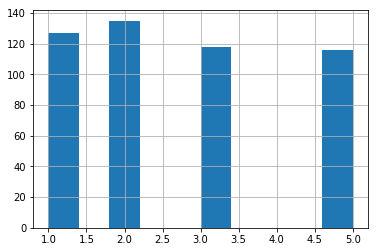

In [14]:
# look at the distribution of regimes
train['Regime'].hist()

In [14]:
train.groupby(['Regime']).size().reset_index(name='Counts')

,Regime,Counts
0,1,127
1,2,135
2,3,118
3,5,116


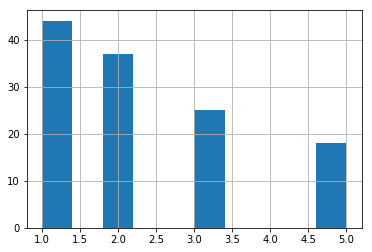

In [15]:
# look at the distribution of regimes
test['Regime'].hist()

In [16]:
test.groupby(['Regime']).size().reset_index(name='Counts')

,Regime,Counts
0,1,44
1,2,37
2,3,25
3,5,18


### Look at correlations between the features

In [17]:
df.iloc[:, 14:34].describe()

,Effluent,Sedimentation,New_Development,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,3827.363948,6.905912,0.025509,0.229942,0.526341,6.365645,0.948522,2.370396,27.196995,0.919022,0.102248,0.090316,52.406900,9.001442,20.822663,0.115180,10.690679,9.546872
std,8556.137170,18.743726,0.040390,0.435801,0.747922,9.469403,1.465142,2.601515,0.409368,0.065704,0.035152,0.052660,4.278262,0.814026,22.295760,0.066225,6.572382,6.090539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.170000,0.801192,0.056300,0.002000,36.231602,6.824600,0.886858,0.041487,-1.309367,0.487680
25%,0.000000,0.000000,0.001873,0.013817,0.121030,0.000000,0.000000,0.144102,26.878000,0.875097,0.083300,0.051400,52.215550,8.343100,6.154151,0.057143,5.542395,4.600000
50%,481.001648,0.000555,0.005849,0.066593,0.301010,0.000000,0.000000,1.794678,27.374000,0.915251,0.091600,0.088900,54.064400,9.263800,11.545006,0.091254,9.767888,8.794600
75%,3421.725342,4.482476,0.032122,0.177509,0.508434,11.745987,1.806736,3.963960,27.469000,0.946601,0.115400,0.134900,54.796200,9.515100,31.146552,0.166070,13.947940,13.000000
max,88142.132810,171.111557,0.376183,2.060731,3.109559,29.123327,5.428471,7.422137,28.291000,1.157028,0.409100,0.235178,56.416500,11.714200,114.938387,0.503056,35.868209,30.000000


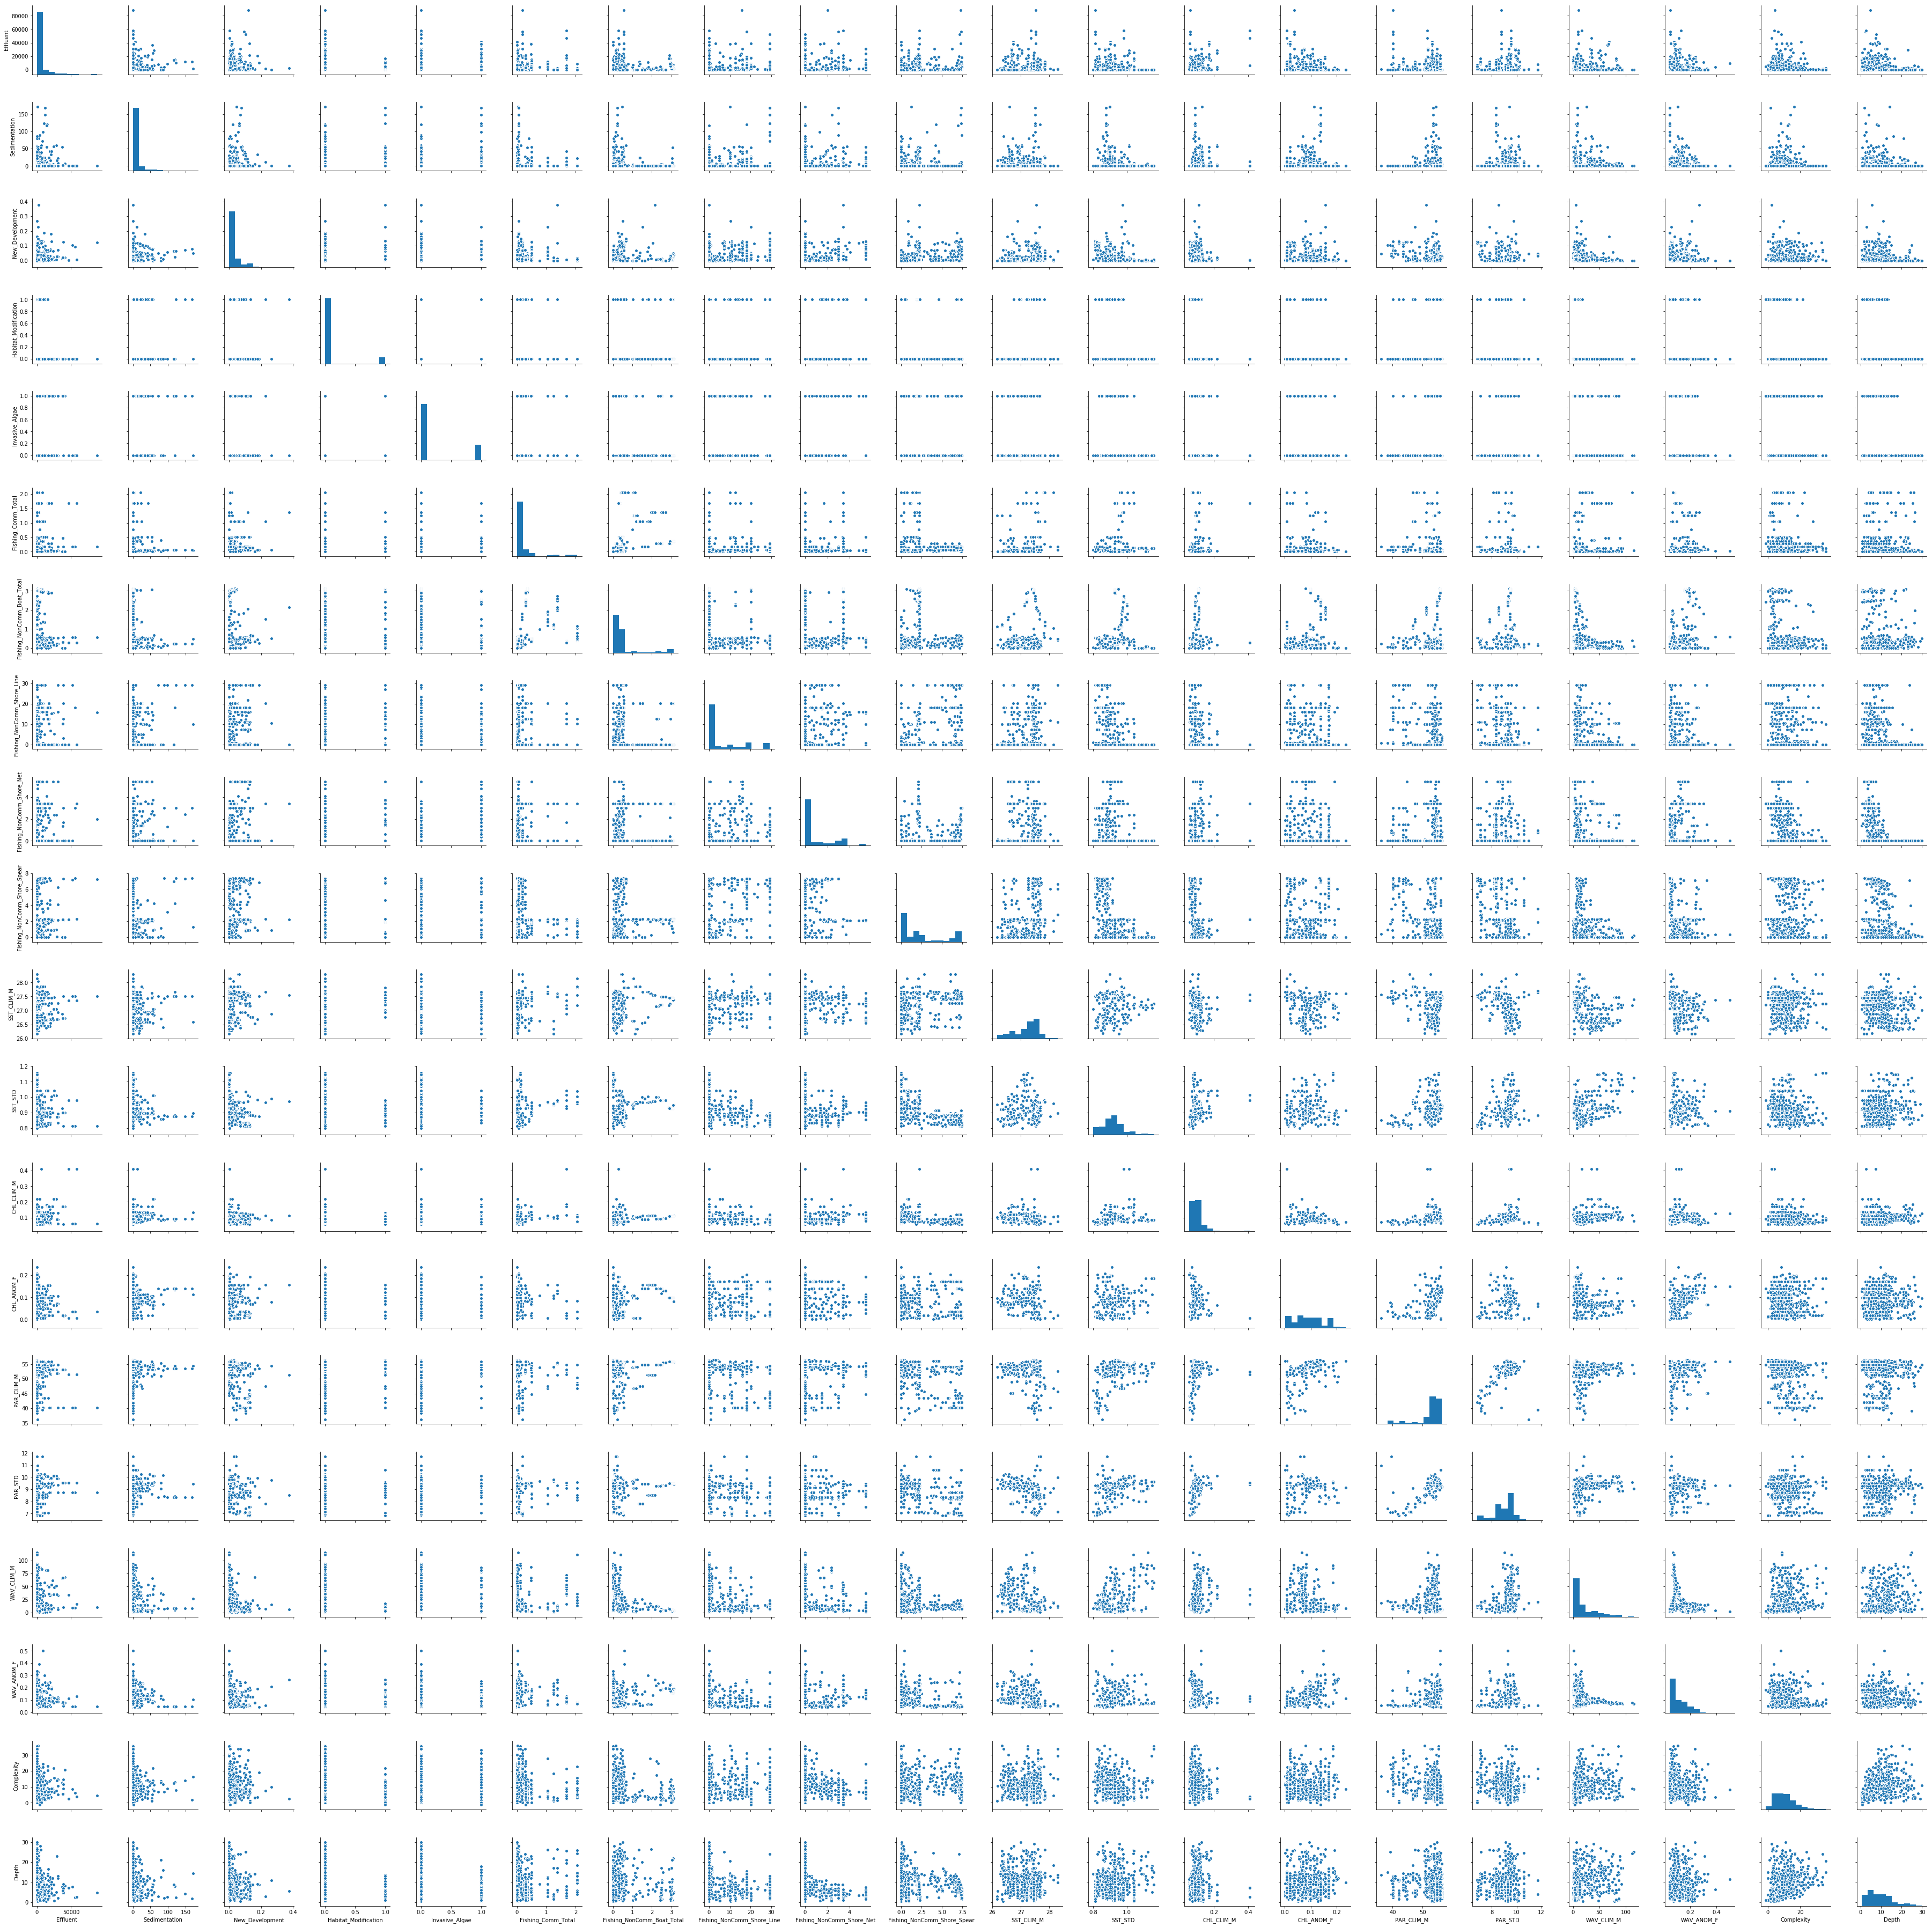

In [18]:
sns.pairplot(df.iloc[:, 14:34].dropna())

In [19]:
def plot_corr(df, size=9):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)


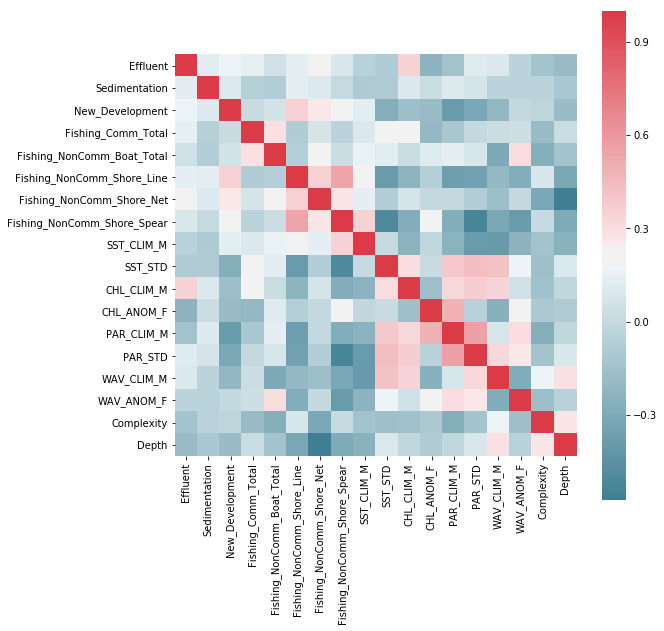

In [20]:
plot_corr(df.iloc[:,14:34])

In [21]:
corr = df.iloc[:,14:34].corr()
corr.style.background_gradient(cmap='coolwarm')

,Effluent,Sedimentation,New_Development,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Complexity,Depth
Effluent,1,0.123824,0.1763,0.146834,0.0482753,0.142841,0.188844,0.0869636,-0.0500867,-0.085605,0.353968,-0.234753,-0.141012,0.120926,0.0997777,-0.0350542,-0.130625,-0.188985
Sedimentation,0.123824,1,0.106301,-0.0620359,-0.0718031,0.13528,0.104147,0.00423883,-0.0898196,-0.0866881,0.0981496,0.0284759,0.110675,0.0716965,-0.0341368,-0.0436234,-0.0434483,-0.10709
New_Development,0.1763,0.106301,1,0.0112916,0.0612866,0.361021,0.258296,0.224318,0.128019,-0.271311,-0.16096,-0.190933,-0.382195,-0.308501,-0.213856,-0.00244791,-0.0235588,-0.18134
Fishing_Comm_Total,0.146834,-0.0620359,0.0112916,1,0.283251,-0.075322,0.070761,-0.0341475,0.102461,0.226274,0.241092,-0.198958,-0.115221,-0.00248638,0.0234577,0.0392839,-0.191297,0.0199405
Fishing_NonComm_Boat_Total,0.0482753,-0.0718031,0.0612866,0.283251,1,-0.0637713,0.238035,0.0247162,0.162781,0.124855,0.0223223,0.117599,0.143229,0.08207,-0.300223,0.303167,-0.263961,-0.134031
Fishing_NonComm_Shore_Line,0.142841,0.13528,0.361021,-0.075322,-0.0637713,1,0.356692,0.548215,0.217731,-0.394035,-0.233958,-0.0664744,-0.365175,-0.346015,-0.198744,-0.272203,0.0801971,-0.31561
Fishing_NonComm_Shore_Net,0.188844,0.104147,0.258296,0.070761,0.238035,0.356692,1,0.267529,0.144256,-0.0724804,0.0698112,-0.00249775,-0.00643345,-0.069331,-0.171075,-0.00608794,-0.313814,-0.572345
Fishing_NonComm_Shore_Spear,0.0869636,0.00423883,0.224318,-0.0341475,0.0247162,0.548215,0.267529,1,0.351551,-0.502036,-0.271722,0.2239,-0.281076,-0.531954,-0.319118,-0.387646,0.00838463,-0.29314
SST_CLIM_M,-0.0500867,-0.0898196,0.128019,0.102461,0.162781,0.217731,0.144256,0.351551,1,0.0076375,-0.245727,-0.00832347,-0.241217,-0.392717,-0.399447,-0.235164,-0.138797,-0.251126
SST_STD,-0.085605,-0.0866881,-0.271311,0.226274,0.124855,-0.394035,-0.0724804,-0.502036,0.0076375,1,0.302525,0.0142381,0.389979,0.439069,0.422092,0.175756,-0.156346,0.09151


### Look at the distribution of test and train observations across islands

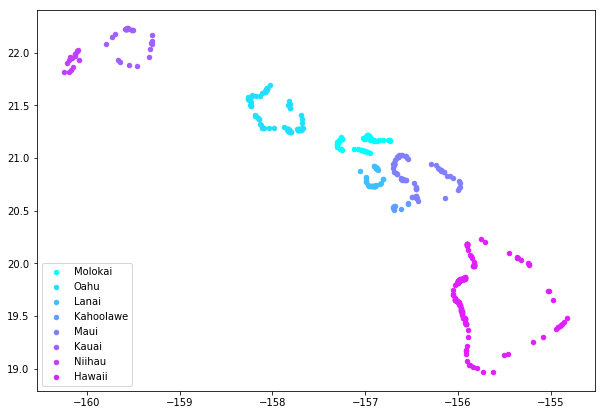

In [22]:
# Unique names of islands
uniq = list(set(train.Island))

# Set the color map to match the number of islands
z = range(1, len(uniq))
hot = plt.get_cmap('cool')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

x = train.Long
y = train.Lat

plt.figure(figsize=(10,7))
# Plot each island
for i in range(len(uniq)):
    indx = train['Island'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i])

plt.legend(loc='lower left')
plt.show()

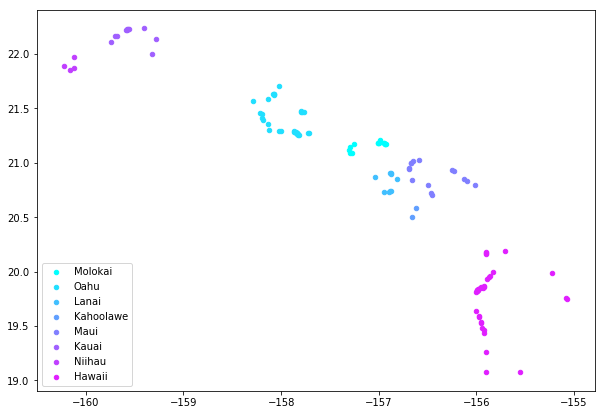

In [23]:
plt.figure(figsize=(10,7))
# Plot each island
for i in range(len(uniq)):
    indx = test['Island'] == uniq[i]
    plt.scatter(test.Long[indx], test.Lat[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i])

plt.legend(loc='lower left')
plt.show()

### Assess collinearity with Variable Inflation Factor

In [24]:
# isolate the predictor columns
# pred = df.iloc[:, 14:34]

# add constant in the matrix of explanatory variable (required by the function)
# pred_const = add_constant(pred.dropna())

In [25]:
# output the variable inflation factors
# pd.Series([variance_inflation_factor(pred_const.values, i) 
#                for i in range(pred_const.shape[1])], 
#               index=pred_const.columns) #.sort_values(ascending=False)

const                          9557.675985
Effluent                          1.533180
Sedimentation                     1.194479
New_Development                   1.475527
Habitat_Modification              1.291691
Invasive_Algae                    1.321413
Fishing_Comm_Total                1.411625
Fishing_NonComm_Boat_Total        1.555146
Fishing_NonComm_Shore_Line        1.912666
Fishing_NonComm_Shore_Net         1.833554
Fishing_NonComm_Shore_Spear       2.858704
SST_CLIM_M                        2.147285
SST_STD                           2.611084
CHL_CLIM_M                        1.827126
CHL_ANOM_F                        2.216701
PAR_CLIM_M                        3.297628
PAR_STD                           2.501900
WAV_CLIM_M                        2.819846
WAV_ANOM_F                        2.103854
Complexity                        1.405406
Depth                             1.886404
dtype: float64

This matches the VIF output in R when I re-run Jouffray's code.

## Logistic Regression

##### Split data into train and test set

In [15]:
# isolate the predictors and labels for both the training and test set
train_X = train.iloc[:, 14:34]
train_y = train['Regime']

test_X = test.iloc[:, 14:34]
test_y = test['Regime']

In [16]:
pred_names = df.iloc[:, 14:34].columns

##### Standardize the data

In [17]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_X)

# Apply transform to both the training set and the test set.
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

##### Helper functions for modeling

In [32]:
def pretty_print_performance(test_y, test_pred, print_vals=True):
    cnf_matrix = metrics.confusion_matrix(test_y, test_pred)
    
    class_names=['Reg 1', 'Reg 2', 'Reg 3', 'Reg 5']
    cnf_matrix = pd.DataFrame(cnf_matrix, index = class_names,
                  columns = class_names)
    
    # plot confusion matrix with heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    if print_vals :
        count_misclassified = (test_y != test_pred).sum()
        print('Misclassified samples: {}'.format(count_misclassified))
        accuracy = metrics.accuracy_score(test_y, test_pred)    
        print('Classification Report:')
        print(metrics.classification_report(test_y, test_pred))  

def microaveage_F1(test_y, test_pred):
    return metrics.classification_report(test_y, test_pred, output_dict=True)['weighted avg']['f1-score']

### Multiclass logistic regression model (one vs. rest)

##### Fit the model & make predictions

In [19]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr')
clf.fit(train_X, train_y)
#clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# make predictions
test_pred = clf.predict(test_X)

##### Evaluate performance

Misclassified samples: 49
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.61      0.67        44
           2       0.67      0.70      0.68        37
           3       0.41      0.52      0.46        25
           5       0.53      0.50      0.51        18

    accuracy                           0.60       124
   macro avg       0.59      0.58      0.58       124
weighted avg       0.62      0.60      0.61       124



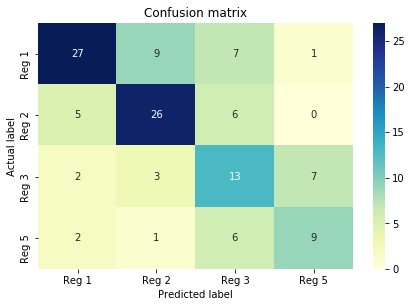

In [21]:
pretty_print_performance(test_y, test_pred)

##### Examining variable importance
Since this is no longer a focus for the project, I'm not doing this for the other models. Just keeping this here in case we want to revisit it for the final project writeup.

In [22]:
# create a data frame with the coefficients for all the multiclass logit coefficients
coef_ovr = pd.DataFrame(clf.coef_, index=clf.classes_, columns=pred_names)

In [23]:
# sort predictors by the magnitude of their coefficients for regime 1
np.abs(coef_ovr.iloc[[0,]]).sort_values(by=1, axis=1, ascending=False)

,Complexity,Fishing_NonComm_Boat_Total,Fishing_Comm_Total,SST_CLIM_M,Fishing_NonComm_Shore_Spear,SST_STD,Fishing_NonComm_Shore_Line,Habitat_Modification,CHL_CLIM_M,CHL_ANOM_F,WAV_CLIM_M,Fishing_NonComm_Shore_Net,PAR_CLIM_M,WAV_ANOM_F,Effluent,Sedimentation,Depth,New_Development,PAR_STD,Invasive_Algae
1,1.233331,0.751874,0.608109,0.517982,0.422212,0.30754,0.262174,0.236708,0.230999,0.185864,0.149817,0.130502,0.12967,0.111274,0.099163,0.038932,0.033694,0.032706,0.007483,0.004783


In [35]:
# for regime 2
np.abs(coef_ovr.iloc[[1,]]).sort_values(by=2, axis=1, ascending=False)

,SST_CLIM_M,WAV_CLIM_M,CHL_ANOM_F,SST_STD,Fishing_NonComm_Boat_Total,Fishing_Comm_Total,Complexity,Fishing_NonComm_Shore_Net,WAV_ANOM_F,Fishing_NonComm_Shore_Spear,Sedimentation,New_Development,Invasive_Algae,Fishing_NonComm_Shore_Line,Habitat_Modification,PAR_STD,Effluent,CHL_CLIM_M,PAR_CLIM_M,Depth
2,0.780326,0.546069,0.405862,0.385898,0.340247,0.319312,0.305375,0.297129,0.276916,0.264253,0.241657,0.235639,0.214799,0.126546,0.118391,0.102582,0.087325,0.054293,0.04322,0.00023


In [36]:
# for regime 3
np.abs(coef_ovr.iloc[[2,]]).sort_values(by=3, axis=1, ascending=False)

,SST_CLIM_M,CHL_CLIM_M,Invasive_Algae,SST_STD,Fishing_NonComm_Shore_Net,Fishing_Comm_Total,Sedimentation,PAR_STD,Fishing_NonComm_Shore_Line,Depth,New_Development,CHL_ANOM_F,Fishing_NonComm_Boat_Total,PAR_CLIM_M,Habitat_Modification,Complexity,WAV_CLIM_M,WAV_ANOM_F,Fishing_NonComm_Shore_Spear,Effluent
3,0.861701,0.710431,0.658872,0.55727,0.512296,0.377359,0.368939,0.314191,0.312631,0.303927,0.278572,0.271328,0.227224,0.205974,0.184821,0.173508,0.168497,0.103721,0.02621,0.015599


In [37]:
# for regime 5
np.abs(coef_ovr.iloc[[3,]]).sort_values(by=5, axis=1, ascending=False)

,WAV_CLIM_M,Invasive_Algae,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Net,SST_CLIM_M,New_Development,PAR_CLIM_M,Complexity,Fishing_Comm_Total,Depth,Fishing_NonComm_Shore_Line,CHL_CLIM_M,SST_STD,PAR_STD,Fishing_NonComm_Shore_Spear,WAV_ANOM_F,Habitat_Modification,Effluent,CHL_ANOM_F,Sedimentation
5,0.77137,0.769613,0.745177,0.627513,0.585718,0.479684,0.426851,0.350209,0.346033,0.342713,0.330597,0.327054,0.303358,0.267997,0.248216,0.186569,0.114202,0.048131,0.042202,0.01655


### Multiclass logistic regression model (multinomial)

##### Fit the model & make predictions

In [24]:
clf_multi = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf_multi.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# make predictions
test_pred_multi = clf_multi.predict(test_X)

##### Evaluate performance

Misclassified samples: 50
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.61      0.66        44
           2       0.69      0.68      0.68        37
           3       0.39      0.48      0.43        25
           5       0.53      0.56      0.54        18

    accuracy                           0.60       124
   macro avg       0.58      0.58      0.58       124
weighted avg       0.61      0.60      0.60       124



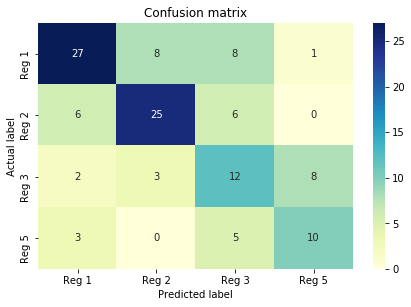

In [33]:
pretty_print_performance(test_y, test_pred_multi)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, zero_one_loss
C = np.logspace(-4, 4, 15)
hyperparameters = dict(C=C)
clf = GridSearchCV(LogisticRegression(solver='newton-cg',
                                      multi_class='multinomial', 
                                      penalty='l2',
                                      random_state=1), 
                   hyperparameters, cv=5, verbose=0, iid=False,
                   scoring=make_scorer(metrics.f1_score, average='micro', greater_is_better=True),
                   return_train_score=True)
best_model = clf.fit(train_X, train_y)

# Best Model is the model picked with the optimal C retrained on the
# entire training data.

print('Best C:', best_model.best_estimator_.get_params()['C'])

Best C: 0.2682695795279725


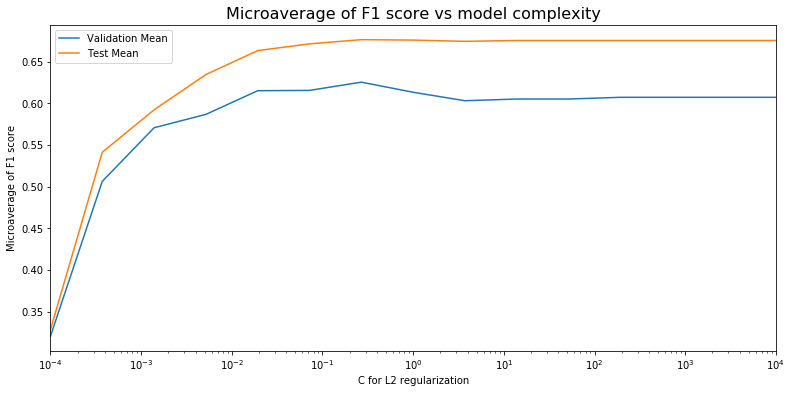

In [28]:
# from scikit-learn, "Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV" 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
results = clf.cv_results_

plt.figure(figsize=(13, 6))
plt.title("Microaverage of F1 score vs model complexity",
          fontsize=16)

plt.xlabel("C for L2 regularization")
plt.ylabel("Microaverage of F1 score")

ax = plt.gca()
plt.xscale("log")
ax.set_xlim(C[0], C[-1])

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

sample_score_mean = results['mean_test_score']
# sample_score_std = results['std_test_score']

train_score_mean = results['mean_train_score']

# add error bars
plt.errorbar(x = X_axis, y = sample_score_mean, 
             label='Validation Mean', capsize=4, capthick=2)
plt.errorbar(x = X_axis, y = train_score_mean, 
             label='Test Mean', capsize=4, capthick=2)

plt.legend()

plt.grid(False)
plt.show()

## Confusion matrix for Cross Validated Regularization

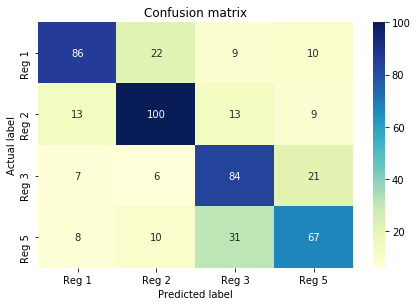

In [34]:
train_pred_multi = best_model.predict(train_X)
pretty_print_performance(train_y, train_pred_multi, False)

## Error Analysis

## Support Vector Machines (SVMs)

### Use a Gaussian Kernel

##### Fit the model & make predictions

In [41]:
svclassifier_gauss = SVC(kernel='rbf')  
svclassifier_gauss.fit(train_X, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
test_pred_svm_gauss = svclassifier_gauss.predict(test_X)  

##### evaluate the performance of the model

Misclassified samples: 39
Accuracy: 0.69 

Classification Report:
             precision    recall  f1-score   support

          1       0.83      0.68      0.75        44
          2       0.68      0.73      0.70        37
          3       0.54      0.60      0.57        25
          5       0.65      0.72      0.68        18

avg / total       0.70      0.69      0.69       124



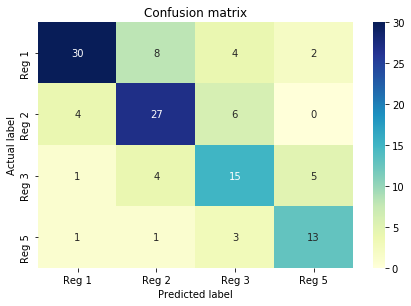

In [43]:
evaluate_performance(test_y, test_pred_svm_gauss)

### Use a Polynomial Kernel

In [44]:
svclassifier_poly = SVC(kernel='poly')  
svclassifier_poly.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
test_pred_svm_poly = svclassifier_poly.predict(test_X)  

Misclassified samples: 44
Accuracy: 0.65 

Classification Report:
             precision    recall  f1-score   support

          1       0.83      0.55      0.66        44
          2       0.64      0.76      0.69        37
          3       0.53      0.72      0.61        25
          5       0.59      0.56      0.57        18

avg / total       0.68      0.65      0.65       124



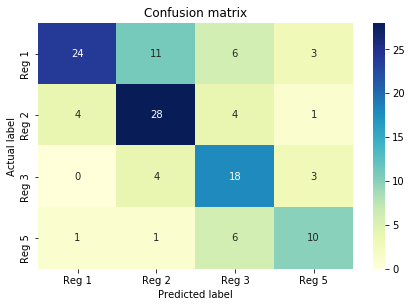

In [46]:
evaluate_performance(test_y, test_pred_svm_poly)